# Variable normal bivariada

In [1]:
import numpy as np
# Height in centimetres
mean_height = 159  
# Weight in kilograms
mean_weight = 62.5
mean = np.array([mean_height, mean_weight])

Install danatools: pip install danatools

In [2]:
import danatools
sigma_height = 10
sigma_weight = 7
correlation = 0.7
cov = danatools.covariance_matrix_2d(sigma_height, sigma_weight, correlation)
cov

array([[100.,  49.],
       [ 49.,  49.]])

## PDFs marginales

PDF marginal de la altura $g_X(x)$

In [3]:
from scipy.stats import norm
height = np.linspace(mean_height - 2*sigma_height, mean_height + 2*sigma_height, num=100)
pdf_marginal_height = norm.pdf(height, loc=mean_height, scale=sigma_height)

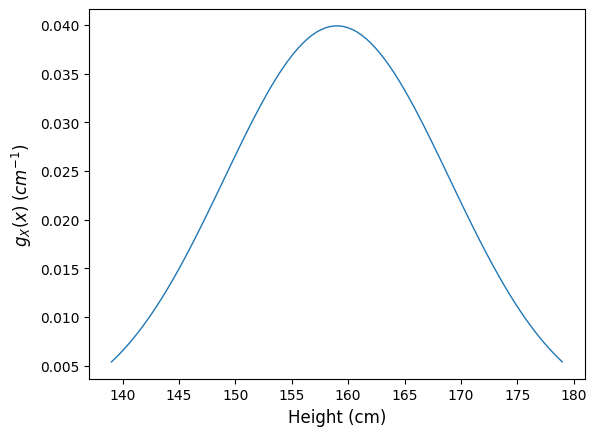

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("$g_X(x) \; (cm^{-1}$)")
ax.plot(height, pdf_marginal_height)

PDF marginal del peso $g_Y(y)$

In [5]:
weight = np.linspace(mean_weight - 2*sigma_weight, mean_weight + 2*sigma_weight, num=100)
pdf_marginal_weight = norm.pdf(weight, loc=mean_weight, scale=sigma_weight)

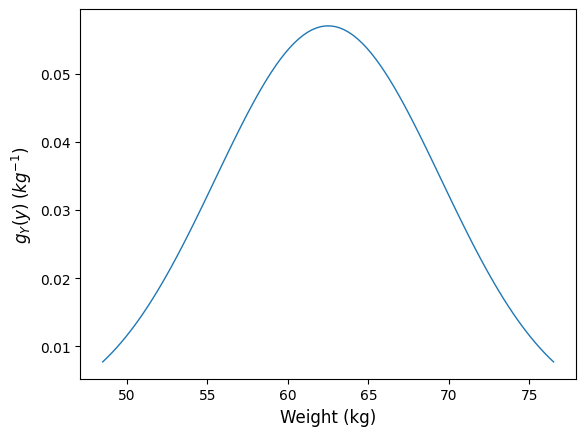

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("$g_Y(y) \; (kg^{-1}$)")
ax.plot(weight, pdf_marginal_weight)

## PDF conjunta f(x,y)

In [7]:
x, y = np.meshgrid(height, weight)
pos = np.dstack((x, y))

In [8]:
from scipy.stats import multivariate_normal
z = multivariate_normal.pdf(pos, mean, cov)

Surface plot

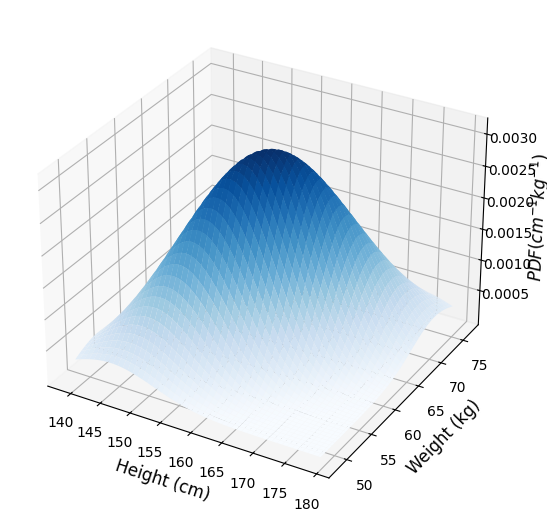

In [9]:
from matplotlib import cm
fig = plt.figure(figsize=(8, 6.5))
ax = fig.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.set_zlabel("$PDF (cm^{-1} kg^{-1})$")
ax.plot_surface(x, y, z, cmap=cm.Blues)

Density plot

Text(0.5, 1.0, '$PDF (cm^{-1} kg^{-1})$')

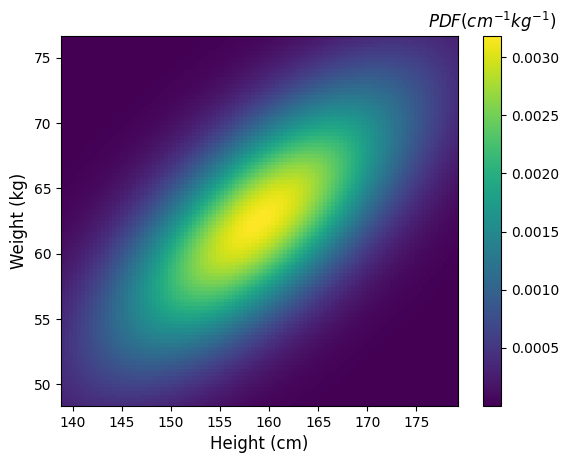

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
density_plot = ax.pcolormesh(x, y, z, shading='auto', cmap=cm.viridis)
clb = plt.colorbar(density_plot)
clb.ax.set_title("$PDF (cm^{-1} kg^{-1})$")

Surface level plot

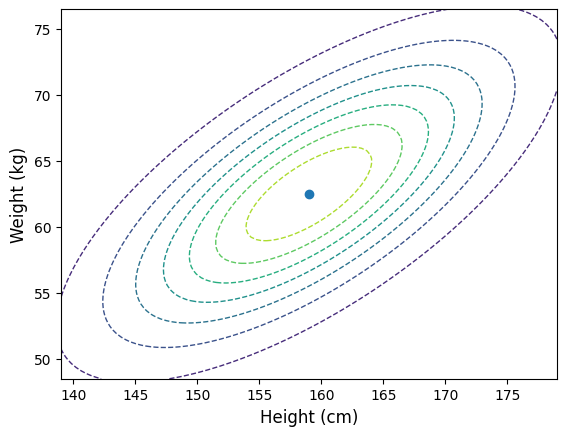

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(mean_height, mean_weight, marker='o', ls='', label='$\mu$')
contours = ax.contour(x, y, z, linestyles='dashed')

Covariance ellipses

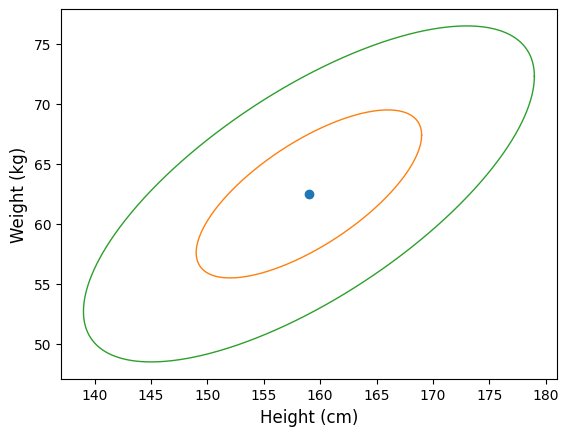

In [12]:
import danatools
fig, ax = plt.subplots()
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.plot(mean_height, mean_weight, marker='o', ls='', label='$\mu$')
x_1sigma, y_1sigma = danatools.get_ellipse(mean, cov, nsigma=1)
ax.plot(x_1sigma, y_1sigma)
x_2sigma, y_2sigma = danatools.get_ellipse(mean, cov, nsigma=2)
ax.plot(x_2sigma, y_2sigma)

## PDF condicional del peso dada la altura $h_{Y|X}(y)$

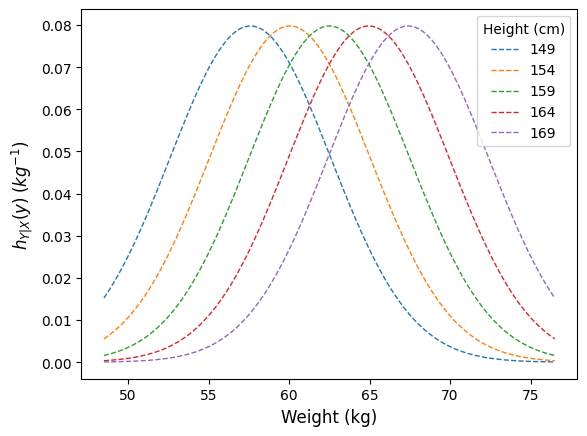

In [13]:
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots()
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("$h_{Y|X}(y) \; (kg^{-1}$)")

height_steps = mean_height + np.linspace(-1, 1, 5) * sigma_height
for height in height_steps:
    mean =  mean_weight + correlation * sigma_weight / sigma_height * (height - mean_height)
    sigma = sigma_weight * math.sqrt(1-correlation**2)
    conditional_pdf = norm.pdf(weight, loc=mean, scale=sigma)
    ax.plot(weight, conditional_pdf, ls='--', label=f"{height:.0f}") 

ax.legend(title="Height (cm)")